# Project 

Here, we have considered the transaction costs as well for the puurpose of identifying optimal weight distribution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
# Read data
df = pd.read_csv("dataset.csv", index_col=0)

# Calculate daily returns
returns = df.pct_change()

# Calculate mean daily return and covariance of daily returns
expected_returns = returns.mean()
cov_matrix = returns.cov()

total_inv = 100000
transaction_cost_rate = 0.005  # 0.5% transaction cost rate

In [4]:
def portfolio_performance(weights, expected_returns, covariance_matrix, trans_cost_rate):
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    transaction_costs = trans_cost_rate * np.sum(np.abs(weights - initial_weights))
    adjusted_portfolio_risk = portfolio_risk + transaction_costs
    return portfolio_return, adjusted_portfolio_risk

In [5]:
def objective(weights, expected_returns, covariance_matrix, trans_cost_rate):
    portfolio_return, adjusted_portfolio_risk = portfolio_performance(weights, expected_returns, covariance_matrix, trans_cost_rate)
    return adjusted_portfolio_risk

In [6]:
Markowitz3_Constraints = (
    {"type": "eq", "fun": lambda x: np.sum(x) - 1},
    {"type": "eq", "fun": lambda x: expected_returns @ x - 0.05},
)
Markowitz4_Constraints = (
    {"type": "eq", "fun": lambda x: np.sum(x) - 1},
    {"type": "ineq", "fun": lambda x: expected_returns @ x - 0.05},
    {"type": "ineq", "fun": lambda x: x},
)

In [7]:
initial_weights = np.ones(len(expected_returns)) / len(expected_returns)

In [8]:
# casee 1 - Target return of 5%
result3 = minimize(
    objective,
    initial_weights,
    args=(expected_returns, cov_matrix, transaction_cost_rate),
    constraints=Markowitz3_Constraints,
)
weights3 = result3.x * total_inv

In [9]:
# case 2 - Target return of 5% and no short selling
result4 = minimize(
    objective,
    initial_weights,
    args=(expected_returns, cov_matrix, transaction_cost_rate),
    constraints=Markowitz4_Constraints,
)
weights4 = result4.x * total_inv

In [10]:
# Calculate portfolio performance for first case
portfolio_return3, portfolio_variance3 = portfolio_performance(
    result3.x, expected_returns, cov_matrix, transaction_cost_rate
)
formatted_weights3 = [format(x, "5.3f") for x in weights3]
print("Weights for Markowitz3: ", formatted_weights3)
print("Portfolio return for Markowitz3: ", portfolio_return3)
print("Portfolio variance for Markowitz3: ", portfolio_variance3)

Weights for Markowitz3:  ['1891.027', '1727.272', '1397.664', '45122.375', '2323.391', '1184.489', '1045.830', '1425.675', '-68175.407', '1292.133', '11441.378', '36202.541', '1359.811', '1586.268', '1485.083', '79428.143', '-210258.610', '15659.092', '1425.456', '1320.259', '143699.376', '1839.392', '1425.648', '1426.693', '1422.035', '1320.258', '191552.024', '1359.799', '1700.200', '-130396.856', '97036.866', '1871.688', '1804.390', '-78500.892', '-115123.277', '1672.772', '2381.938', '1072.094', '1848.695', '1485.067', '1849.785', '1241.151', '75812.107', '1269.822', '1926.942', '1734.481', '-254596.296', '1758.955', '1061.781', '1243.108', '48189.146', '1459.363', '1490.785', '230115.228', '166450.753', '196509.144', '1518.167', '956.668', '-397547.567', '-195857.263', '63406.313', '1013.950', '1370.363', '22955.399', '1450.047', '1449.618', '18843.911', '41814.080', '1328.278']
Portfolio return for Markowitz3:  0.050000000023771175
Portfolio variance for Markowitz3:  0.4275059357

In [11]:
# Calculate portfolio performance for second case
portfolio_return4, portfolio_variance4 = portfolio_performance(
    result4.x, expected_returns, cov_matrix, transaction_cost_rate
)
formatted_weights4 = [format(x, "5.3f") for x in weights4]
print("Weights for Markowitz4: ", formatted_weights4)
print("Portfolio return for Markowitz4: ", portfolio_return4)
print("Portfolio variance for Markowitz4: ", portfolio_variance4)

Weights for Markowitz4:  ['0.000', '0.000', '-0.000', '-0.000', '0.000', '-0.000', '-0.000', '0.000', '0.000', '-0.000', '-0.000', '-0.000', '-0.000', '-0.000', '0.000', '100000.000', '0.000', '0.000', '0.000', '-0.000', '0.000', '-0.000', '-0.000', '-0.000', '-0.000', '-0.000', '0.000', '-0.000', '0.000', '0.000', '-0.000', '-0.000', '-0.000', '0.000', '-0.000', '0.000', '-0.000', '0.000', '0.000', '0.000', '0.000', '-0.000', '0.000', '-0.000', '0.000', '-0.000', '0.000', '-0.000', '0.000', '-0.000', '-0.000', '-0.000', '0.000', '-0.000', '-0.000', '-0.000', '0.000', '-0.000', '-0.000', '-0.000', '-0.000', '-0.000', '-0.000', '-0.000', '-0.000', '-0.000', '0.000', '-0.000', '0.000']
Portfolio return for Markowitz4:  0.0052475555391123235
Portfolio variance for Markowitz4:  0.12029462827659293


In [12]:
# Calculate the Markowitz Curve 
# Target return of 5%
returns = []
risks = []
for target_return in np.linspace(0.0, 0.20, 100):
    constraints = [
        {"type": "eq", "fun": lambda w: np.sum(w) - 1},
        {"type": "eq", "fun": lambda w: expected_returns @ w - target_return},
    ]
    result = minimize(
        objective,
        initial_weights,
        args=(expected_returns, cov_matrix, transaction_cost_rate),
        constraints=constraints,
    )
    portfolio_return, adjusted_portfolio_risk = portfolio_performance(
        result.x, expected_returns, cov_matrix, transaction_cost_rate
    )
    returns.append(portfolio_return)
    risks.append(adjusted_portfolio_risk)

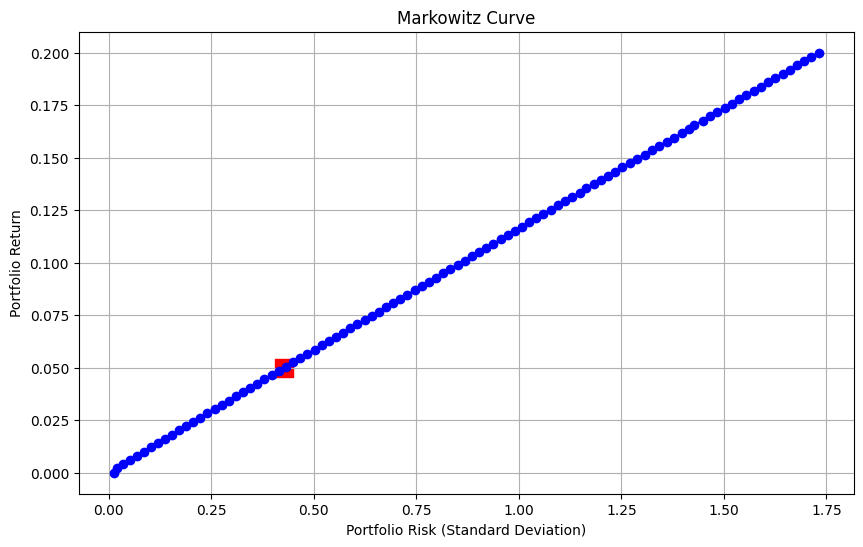

In [13]:
# Plot Markowitz Curve 
plt.figure(figsize=(10, 6))
plt.plot(
    risks,
    returns,
    label="Markowitz Curve with Transaction Costs (Markowitz 3)",
    marker="o",
    linestyle="-",
    color="b",
)
plt.scatter(
    [portfolio_variance3],
    [portfolio_return3],
    color="r",
    marker="s",
    label="Optimal Portfolio (Markowitz 3)",
    s=150,
)
plt.xlabel("Portfolio Risk (Standard Deviation)")
plt.ylabel("Portfolio Return")
plt.title("Markowitz Curve")
plt.grid(True)
plt.show()

In [14]:
# Calculate the Markowitz Curve 
# Target return of 5% and no short selling
returns = []
risks = []
for target_return in np.linspace(0.0, 0.5, 5000):
    constraints = [
        {"type": "eq", "fun": lambda x: np.sum(x) - 1},
        {"type": "ineq", "fun": lambda x: expected_returns @ x - target_return},
        {"type": "ineq", "fun": lambda x: x},
    ]
    result = minimize(
        objective,
        initial_weights,
        args=(expected_returns, cov_matrix, transaction_cost_rate),
        constraints=constraints,
    )
    portfolio_return, adjusted_portfolio_risk = portfolio_performance(
        result.x, expected_returns, cov_matrix, transaction_cost_rate
    )
    returns.append(portfolio_return)
    risks.append(adjusted_portfolio_risk)

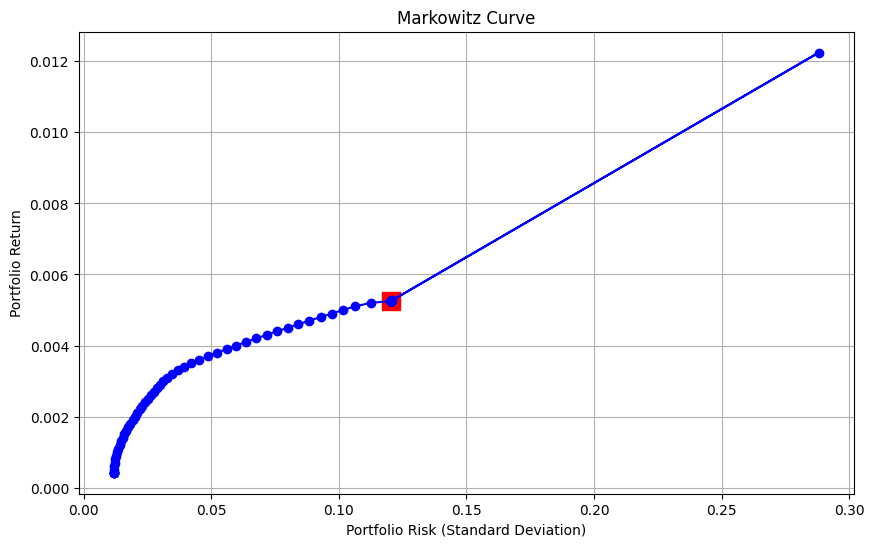

In [15]:
# Plot Markowitz Curve for Markowitz 4
plt.figure(figsize=(10, 6))
plt.plot(
    risks,
    returns,
    label="Markowitz Curve with Transaction Costs (Markowitz 4)",
    marker="o",
    linestyle="-",
    color="b",
)
plt.scatter(
    [portfolio_variance4],
    [portfolio_return4],
    color="r",
    marker="s",
    label="Optimal Portfolio (Markowitz 4)",
    s=150,
)
plt.xlabel("Portfolio Risk (Standard Deviation)")
plt.ylabel("Portfolio Return")
plt.title("Markowitz Curve")
plt.grid(True)
plt.show()